In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam as adam
from tensorflow.keras import backend
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from itertools import product as myzip
import PIL

In [73]:
my_path = 'D:\s4353631\ISIC2018_'
datasets = {'train': [0, .7],
            'val': [.7, .9],
            'test': [.9, 1]}

x_paths = glob.glob(my_path + 'x' + '/*.jpg')
labels = [i[-11:-4] for i in x_paths]

orig_shapes = []
for i in x_paths:
    i = tf.io.read_file(i)
    i = tf.io.decode_png(i)
    orig_shapes.append(tuple(i.shape[:-1]))

data_dict = {}

for i in datasets.keys():
    lower_bound = int(datasets[i][0] * len(labels))
    upper_bound = int(datasets[i][1] * len(labels))
    
    data_dict[i] = {'labels': labels[lower_bound:upper_bound],
                    'orig_shapes': sizes[lower_bound:upper_bound],
                    'quantity': upper_bound - lower_bound}

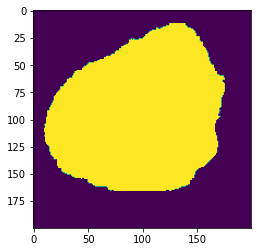

In [52]:
def data_generator(dataset)
    x = tf.io.read_file('D:\s4353631\ISIC2018_x\ISIC_0000000.jpg')
    x = tf.io.decode_jpeg(x)

    y = tf.io.read_file('D:\s4353631\ISIC2018_y\ISIC_0000000_segmentation.png')
    y = tf.io.decode_png(y)

    x, y = [tf.image.resize(tf.cast(i, tf.float32) / 255, [200, 200]) for i in (x, y)]

    y = tf.math.round(y)

In [37]:
my_img = tf.io.read_file('D:\s4353631\ISIC2018_y\ISIC_0000000_segmentation.png')
my_tens = tf.io.decode_png(my_img)

tf.unique(tf.reshape(my_tens, [-1]))

Unique(y=<tf.Tensor: shape=(230,), dtype=uint8, numpy=
array([  0,   3,  21,  24,  10, 199, 225, 223, 226, 161,  20,  25, 229,
       255, 113,  23,  86, 242, 178,  17,  79, 213, 222, 240, 164,  32,
         9,  81, 231, 254, 160,  18,   2,  82, 221, 241,  31, 197, 159,
        22,  19,  85, 244, 224,   8, 212, 228, 196, 156,  89, 211,  30,
         6,  16,  83, 149, 163,  77, 220, 162, 230, 227, 158, 219,  76,
       114, 126,  15, 210, 239, 175, 209, 214,  80, 243,  78,  28, 208,
       218,   7, 155,   5,  14, 145, 129, 207, 111, 217, 238, 128, 172,
        84,  27,  75, 252, 216, 125, 173,  26, 253, 154,  13,  73, 205,
        74, 206, 215, 237,  12, 204,  72,  71, 151,  70,   4, 138, 110,
       203, 236, 109, 193, 108, 127, 248, 170, 201, 188, 235,  11, 147,
       234, 186, 107, 133, 146, 168, 251, 102, 144, 198,  68, 233, 169,
       143,  69,  91, 148, 101, 167, 142, 195,  63, 100, 185, 165, 141,
       249, 250,  90, 139, 105, 166, 202, 103,  93,   1,  52, 176,  65,
       19

In [ ]:
def format_fn(path):
    '''
    Formats single-channel image (.png) at path as a tf.Tensor of shape suitable 
    for input to a CNN.
    
    Args:
        path (str): Image filepath.
        
    Returns:
        tf.Tensor: formatted tensor representing the image.
    '''
    img = tf.io.read_file(path)
    tens = tf.image.decode_png(img)
    
    return tf.reshape(tens, [256, 256, 1])

def path_2_tens(x_path, y_path, pixels=pixels):
    '''
    Formats x and y single-channel images (.png) as tf.Tensors of shape suitable 
    for input to a CNN. Formatting of y images is performed by separating the pixel 
    values in pixels into discrete Boolean channels along the depth axis.
    
    Args:
        x_path (str): x image (raw input) filepath.
        y_path (str): y image (raw input) filepath.
        
    Returns:
        x (tf.Tensor): Formatted tensor representing the x image.
        y (tf.Tensor): Formatted tensor of Boolean channels representing the y image.
    '''
    x = format_fn(x_path)
    x = tf.cast(x, tf.float32)/127.5 - 1.0
    
    y = format_fn(y_path)
    y = tf.reshape(y, [256, 256])
    y = tf.stack([y==pixel for pixel in pixels], axis=2)
    y = tf.cast(y, tf.float32)
    
    return x, y

In [ ]:
x_paths = glob.glob(my_path + 'x' + '/*.jpg')
y_paths = glob.glob(my_path + 'y' + '/*.jpg')

for dataset in datasets:
    data_dict[dataset] = tf.data.Dataset.from_tensor_slices((x_paths, y_paths))
    data_dict[dataset] = data_dict[dataset].shuffle(10**5, reshuffle_each_iteration=True)
    data_dict[dataset] = data_dict[dataset].map(path_2_tens)